In [25]:
import cv2, numpy as np 
import matplotlib.pyplot as plt 

im = cv2.imread("pixels/image-15.png")
canvas = np.zeros((1200, 2000, 3), dtype='uint8')


x = np.arange(im.shape[1])
y = np.arange(im.shape[0])
xg, yg = np.meshgrid(x, y)
print(xg, yg)
xg = xg.reshape(-1)
yg = yg.reshape(-1)
print(xg, yg)


th = 30 * np.pi / 180

xc = xg * np.cos(th) - yg * np.sin(th)
yc = xg * np.sin(th) + yg * np.cos(th)
xci = xc.astype(int)
yci = yc.astype(int)

[[  0   1   2 ... 637 638 639]
 [  0   1   2 ... 637 638 639]
 [  0   1   2 ... 637 638 639]
 ...
 [  0   1   2 ... 637 638 639]
 [  0   1   2 ... 637 638 639]
 [  0   1   2 ... 637 638 639]] [[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [423 423 423 ... 423 423 423]
 [424 424 424 ... 424 424 424]
 [425 425 425 ... 425 425 425]]
[  0   1   2 ... 637 638 639] [  0   0   0 ... 425 425 425]


In [15]:
xx = xci[ np.ma.masked_inside(xci, 0, canvas.shape[1]-1) ]
yy = yci[ np.ma.masked_inside(yci, 0, canvas.shape[0]-1) ]

array([  0,   0,   0, ..., 293, 294, 294])

In [16]:
xg.shape

(272640,)

In [17]:
xgi = xg[ np.ma.masked_inside(xci, 0, canvas.shape[1]-1) ]
ygi = yg[ np.ma.masked_inside(yci, 0, canvas.shape[0]-1) ]

In [18]:
xgi

array([  0,   0,   1, ..., 339, 340, 340])

In [20]:
ii = im.reshape(-1, 3)
ii[0]

array([ 86, 165, 204], dtype=uint8)

In [21]:
ii[xgi]

array([[ 86, 165, 204],
       [ 86, 165, 204],
       [ 86, 165, 204],
       ...,
       [ 86, 184, 254],
       [ 86, 184, 254],
       [ 86, 184, 254]], dtype=uint8)

In [34]:
m = im[:,:,0] > 128
im[im[:,:,0] <= 128] = 0
im[im[:,:,0] > 128] = 255

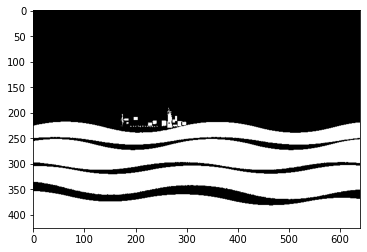

In [35]:
plt.imshow(im);